- 1. Sample App can be found on the iOS App Store.
- 2. Sample App made a change to a marketing campaign that impacted their store listing on 
10/28/20.
- 3. This change will influence their App Store Search channel

## Data Loading:

In [61]:
# import libraries:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

%matplotlib inline

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1)
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#from IPython.display import display, HTML

from mpl_toolkits.mplot3d import Axes3D

import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [62]:
#loading data:
df=pd.read_csv('SampleApp.csv')
df.shape

(1389, 11)

In [63]:
df.isnull().sum()

Date                            0
App Referrer Impressions        0
App Store Browse Impressions    0
App Store Search Impressions    0
Unavailable Impressions         0
Web Referrer Impressions        0
App Referrer App Units          0
App Store Browse App Units      0
App Store Search App Units      0
Unavailable App Units           0
Web Referrer App Units          0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          1389 non-null   object
 1   App Referrer Impressions      1389 non-null   int64 
 2   App Store Browse Impressions  1389 non-null   int64 
 3   App Store Search Impressions  1389 non-null   int64 
 4   Unavailable Impressions       1389 non-null   int64 
 5   Web Referrer Impressions      1389 non-null   int64 
 6   App Referrer App Units        1389 non-null   int64 
 7   App Store Browse App Units    1389 non-null   int64 
 8   App Store Search App Units    1389 non-null   int64 
 9   Unavailable App Units         1389 non-null   int64 
 10  Web Referrer App Units        1389 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 119.5+ KB


In [65]:
df.describe()

,App Referrer Impressions,App Store Browse Impressions,App Store Search Impressions,Unavailable Impressions,Web Referrer Impressions,App Referrer App Units,App Store Browse App Units,App Store Search App Units,Unavailable App Units,Web Referrer App Units
count,1389.000000,1.389000e+03,1.389000e+03,1389.000000,1389.000000,1389.000000,1389.000000,1389.00000,1389.000000,1389.000000
mean,11510.963283,1.224853e+05,1.017026e+05,0.053996,6473.228222,852.948884,744.902088,5812.12455,58.796976,1664.620590
std,13947.734250,2.362480e+05,6.982393e+04,0.400783,3706.795538,549.582811,763.375742,1750.87506,133.338097,1035.268146
min,1037.000000,1.930800e+04,2.143700e+04,0.000000,2117.000000,32.000000,143.000000,260.00000,0.000000,718.000000
25%,4457.000000,4.292000e+04,6.200000e+04,0.000000,3673.000000,455.000000,403.000000,4777.00000,27.000000,1180.000000
50%,8602.000000,7.715200e+04,9.691300e+04,0.000000,5532.000000,675.000000,587.000000,5423.00000,37.000000,1400.000000
75%,13120.000000,1.449880e+05,1.301180e+05,0.000000,8267.000000,1133.000000,875.000000,6392.00000,50.000000,1798.000000
max,249327.000000,3.321598e+06,1.255685e+06,7.000000,41237.000000,3958.000000,14833.000000,17605.00000,2718.000000,18323.000000


## Data preprocessing
- 1. value check
- 2. data types check
- 3. Missing value

In [66]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,App Referrer Impressions,App Store Browse Impressions,App Store Search Impressions,Unavailable Impressions,Web Referrer Impressions,App Referrer App Units,App Store Browse App Units,App Store Search App Units,Unavailable App Units,Web Referrer App Units
0,2017-04-15,4333,95458,24877,0,5290,827,363,4290,42,1915
1,2017-04-16,4490,89147,24555,0,4877,863,403,4093,25,1838
2,2017-04-17,5347,89628,27073,0,7217,1052,363,4783,43,2643
3,2017-04-18,4740,91558,29643,0,7478,1047,430,5440,38,2765
4,2017-04-19,5422,92908,30597,0,7802,1132,442,5573,43,2820


In [27]:
#change data index and types
after=df[df['Date']>='2020-10-28'].reset_index(drop=True)
before=df[df['Date']<'2020-10-28'].reset_index(drop=True)

In [28]:
describe=pd.concat([before.describe().round(1),after.describe().round(1)])

In [29]:
col=describe.columns

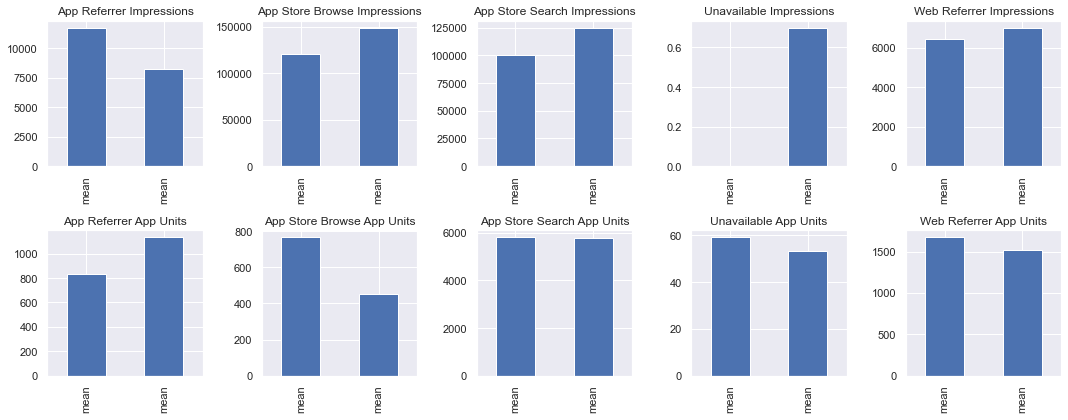

In [30]:
#mean comparison:
plt.figure(figsize=(15,6))
plt.ticklabel_format(useOffset=False)
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.title(str(col[i]))
    describe[col[i]]['mean'].plot(kind='bar',title=str(col[i]))
    plt.tight_layout()
plt.savefig('comparison1.png')

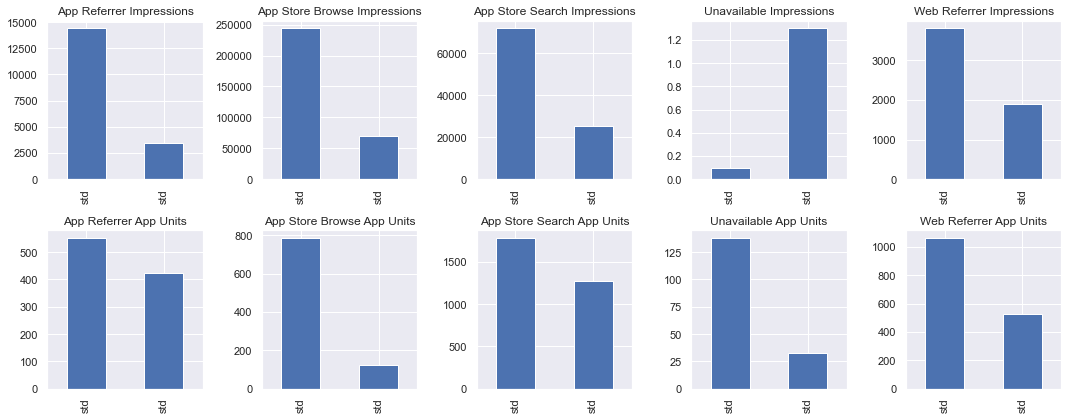

In [31]:
#std comparison:
plt.figure(figsize=(15,6))
plt.ticklabel_format(useOffset=False)
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.title(str(col[i]))
    describe[col[i]]['std'].plot(kind='bar',title=str(col[i]))
    plt.tight_layout()
plt.savefig('comparison1.png')

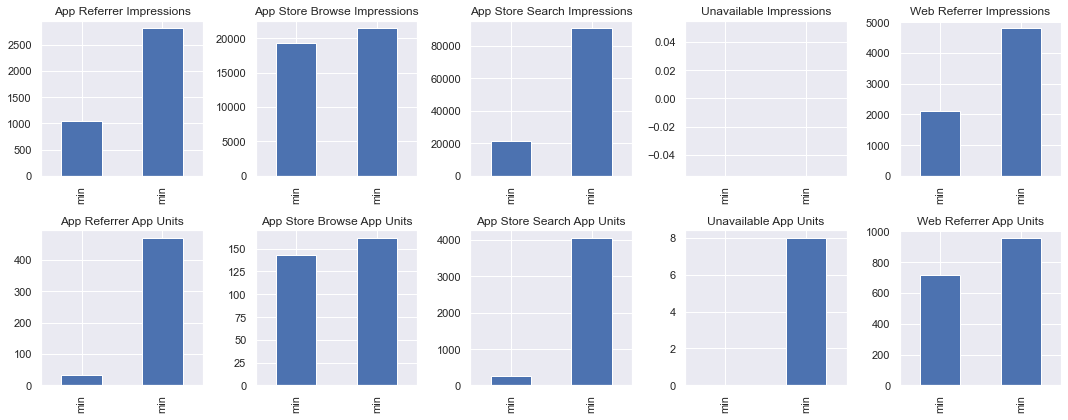

In [32]:
#min comparison:
plt.figure(figsize=(15,6))
plt.ticklabel_format(useOffset=False)
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.title(str(col[i]))
    describe[col[i]]['min'].plot(kind='bar',title=str(col[i]))
    plt.tight_layout()
plt.savefig('comparison1.png')

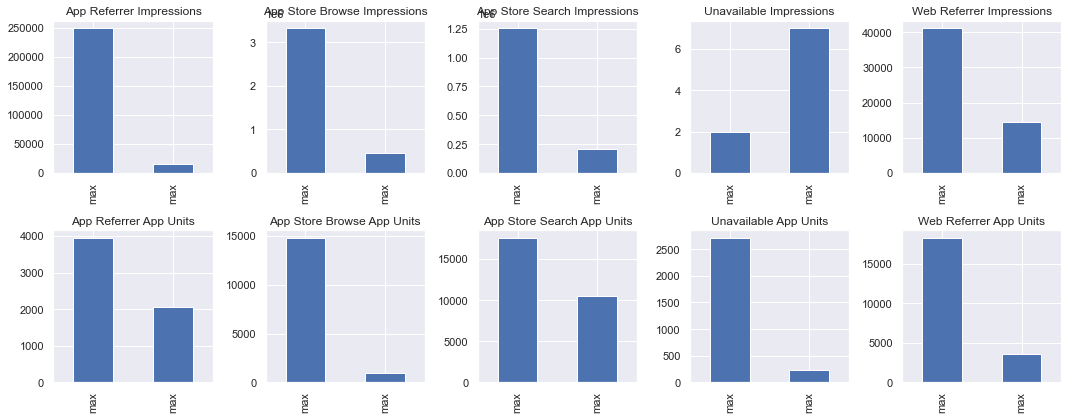

In [33]:
#max comparison:
plt.figure(figsize=(15,6))
plt.ticklabel_format(useOffset=False)
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.title(str(col[i]))
    describe[col[i]]['max'].plot(kind='bar',title=str(col[i]))
    plt.tight_layout()
plt.savefig('comparison4.png')

In [34]:
after.describe().round(1)

,App Referrer Impressions,App Store Browse Impressions,App Store Search Impressions,Unavailable Impressions,Web Referrer Impressions,App Referrer App Units,App Store Browse App Units,App Store Search App Units,Unavailable App Units,Web Referrer App Units
count,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0
mean,8235.1,149222.9,125021.2,0.7,7017.5,1134.6,453.8,5793.5,53.2,1524.5
std,3410.6,69806.6,25452.1,1.3,1883.6,423.3,125.4,1268.8,32.6,526.0
min,2813.0,21433.0,90740.0,0.0,4805.0,470.0,162.0,4062.0,8.0,958.0
25%,4680.0,76977.0,107447.0,0.0,5683.0,702.0,393.0,4980.0,35.0,1190.0
50%,8572.0,168387.0,117143.0,0.0,6667.0,1140.0,442.0,5373.0,47.0,1372.0
75%,10998.0,193883.0,140947.0,2.0,7672.0,1488.0,508.0,6208.0,65.0,1678.0
max,15062.0,446410.0,206392.0,7.0,14617.0,2052.0,977.0,10457.0,237.0,3573.0


In [35]:
#change index
before.index=before.Date
before=before[['App Referrer Impressions', 'App Store Browse Impressions',
       'App Store Search Impressions', 'Unavailable Impressions',
       'Web Referrer Impressions', 'App Referrer App Units',
       'App Store Browse App Units', 'App Store Search App Units',
       'Unavailable App Units', 'Web Referrer App Units']]
after.index=after.Date
after=after[['App Referrer Impressions', 'App Store Browse Impressions',
       'App Store Search Impressions', 'Unavailable Impressions',
       'Web Referrer Impressions', 'App Referrer App Units',
       'App Store Browse App Units', 'App Store Search App Units',
       'Unavailable App Units', 'Web Referrer App Units']]
df.index=df.Date
df=df[['App Referrer Impressions', 'App Store Browse Impressions',
       'App Store Search Impressions', 'Unavailable Impressions',
       'Web Referrer Impressions', 'App Referrer App Units',
       'App Store Browse App Units', 'App Store Search App Units',
       'Unavailable App Units', 'Web Referrer App Units']]

# Data Visualization

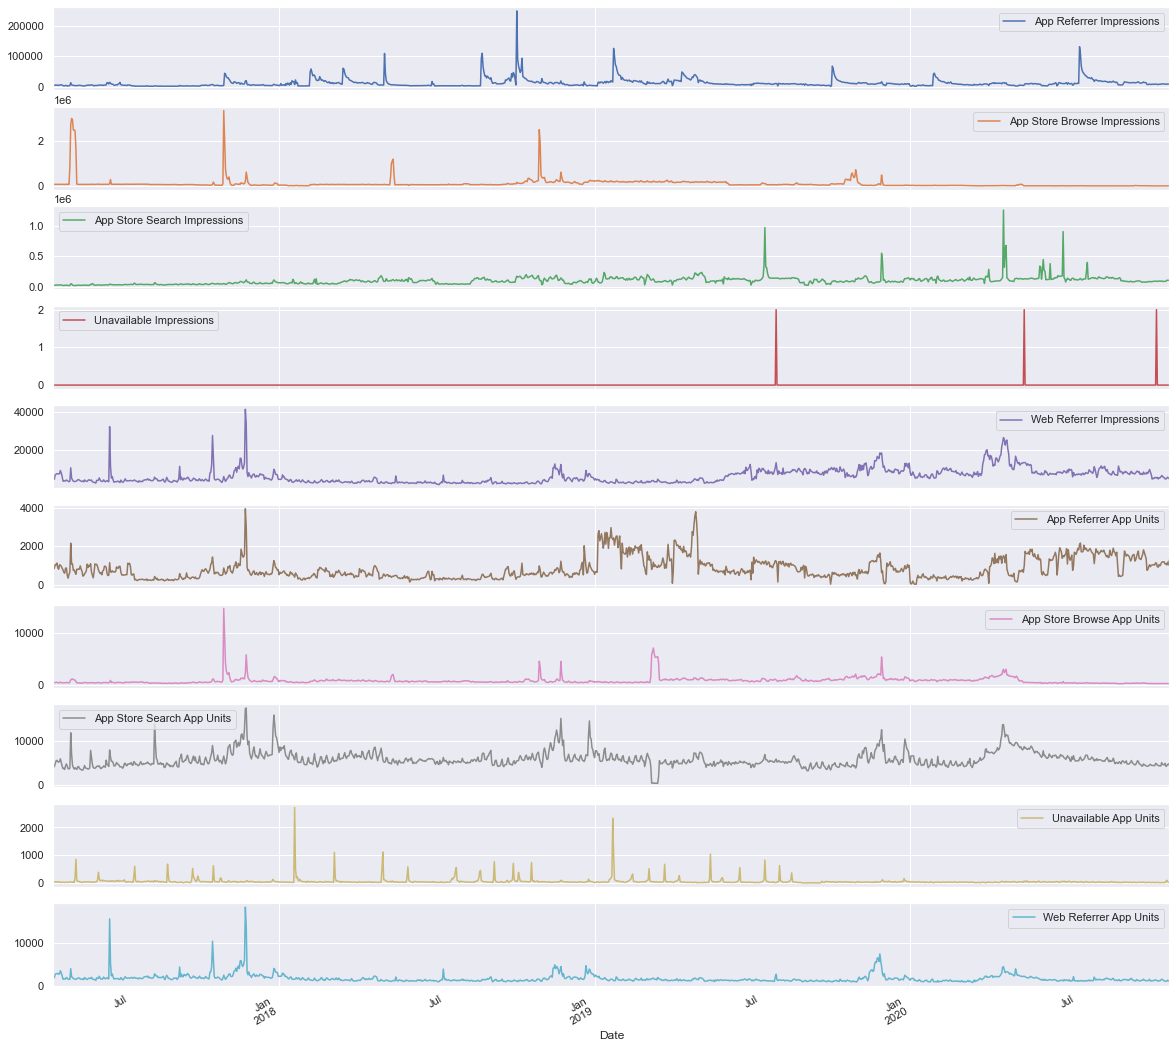

In [36]:
# Line plot
a=before.plot(subplots=True,figsize = (20, 20));
plt.savefig('Before.png')

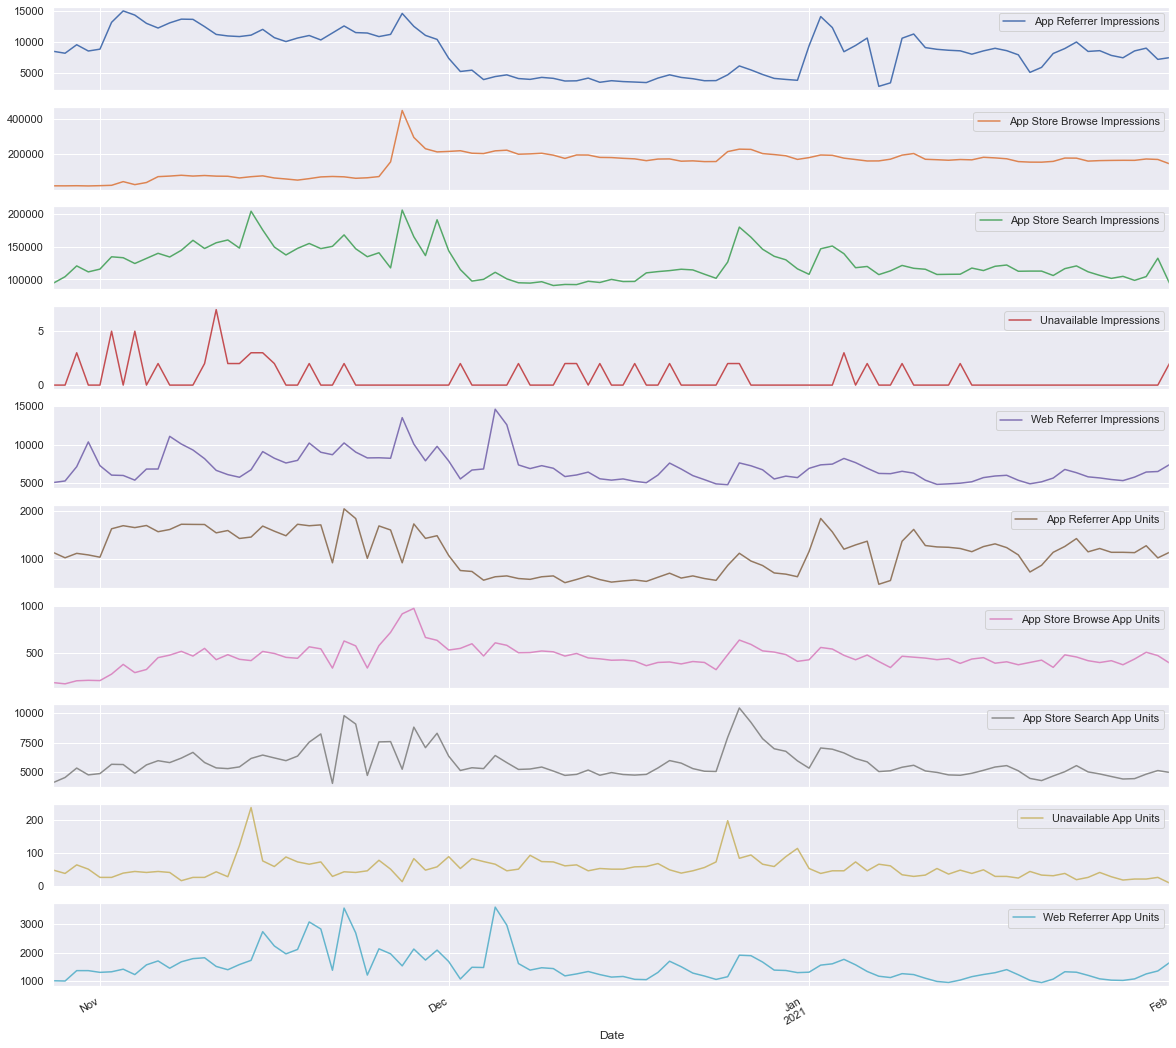

In [37]:
b=after.plot(subplots=True,figsize = (20, 20));
plt.savefig('After.png')

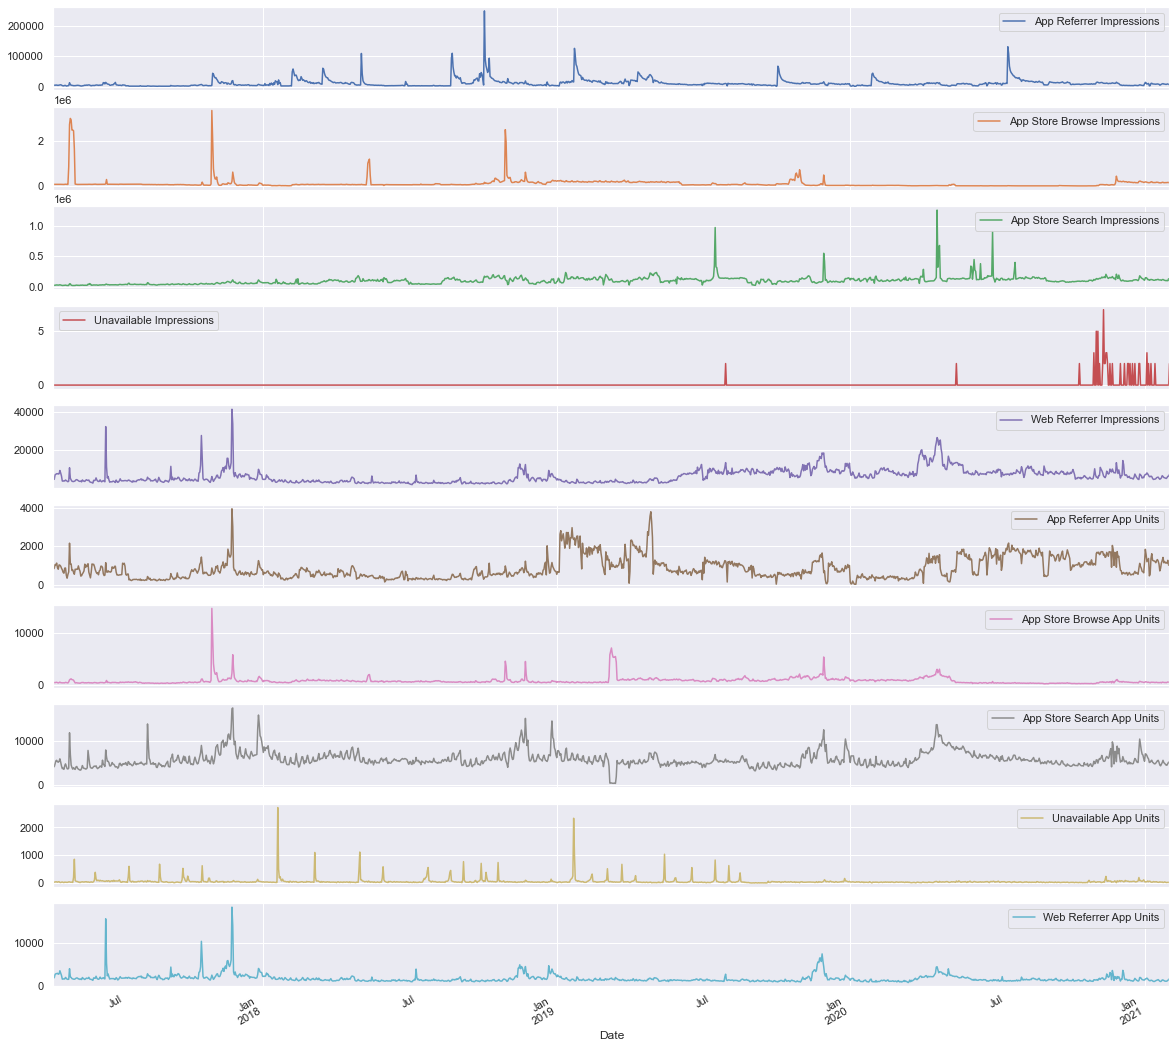

In [69]:
# in general, what's the trend?
a=df.plot(subplots=True,figsize = (20, 20));
plt.savefig('a.png')

<AxesSubplot:xlabel='Date', ylabel='App Referrer Impressions'>

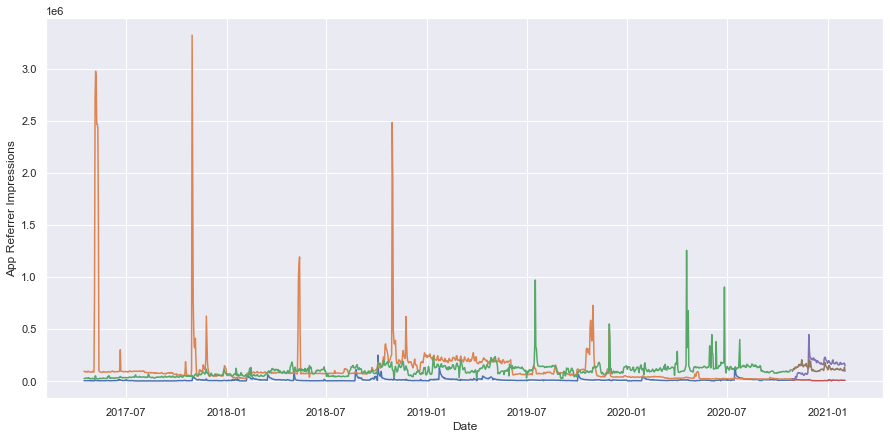

In [38]:
# Impression:
plt.figure(figsize = (15, 7))
sns.lineplot(data = before['App Referrer Impressions'])
sns.lineplot(data = before['App Store Browse Impressions'], palette=['red'])
sns.lineplot(data = before['App Store Search Impressions'], palette=['green'])
sns.lineplot(data = after['App Referrer Impressions'], palette=['white'])
sns.lineplot(data = after['App Store Browse Impressions'], palette=['yellow'])
sns.lineplot(data = after['App Store Search Impressions'], palette=['pink'])

In [39]:
col=after.columns
cols=['App Referrer Impressions', 'App Store Browse Impressions',
       'App Store Search Impressions', 
       'Web Referrer Impressions', 'App Referrer App Units',
       'App Store Browse App Units', 'App Store Search App Units',
        'Web Referrer App Units']

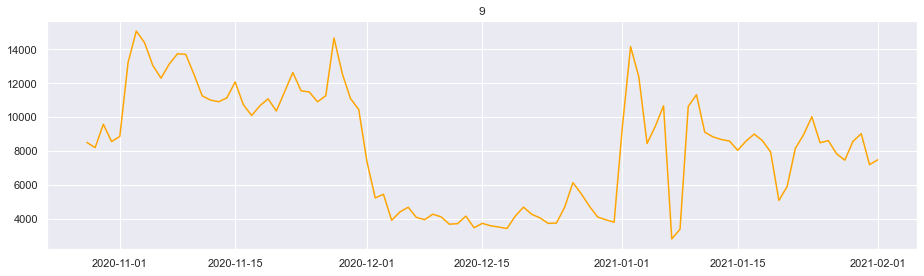

In [40]:
plt.figure(figsize = (13, 4))
plt.plot(after.index,after['App Referrer Impressions'],color="orange")
plt.title(str(i))
plt.tight_layout()


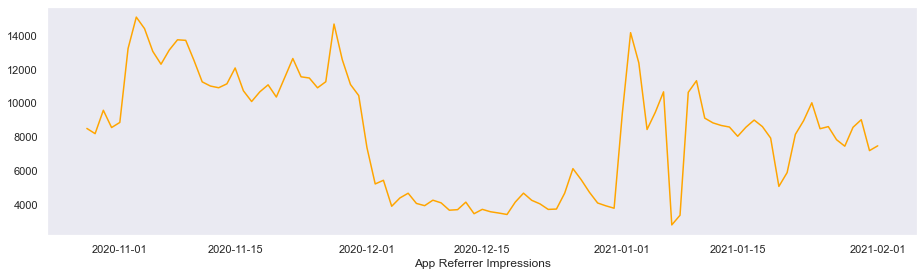

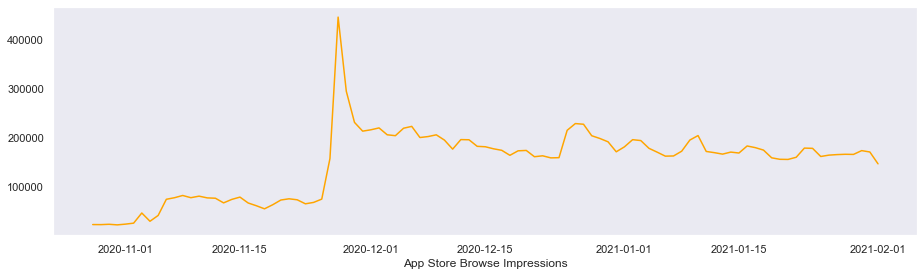

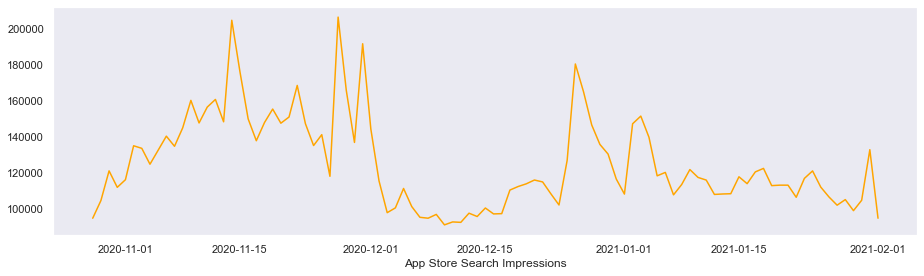

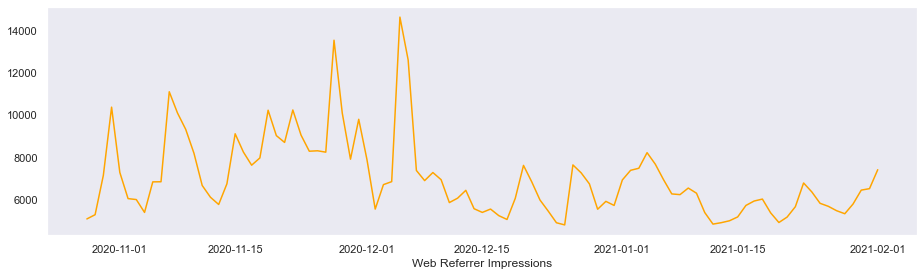

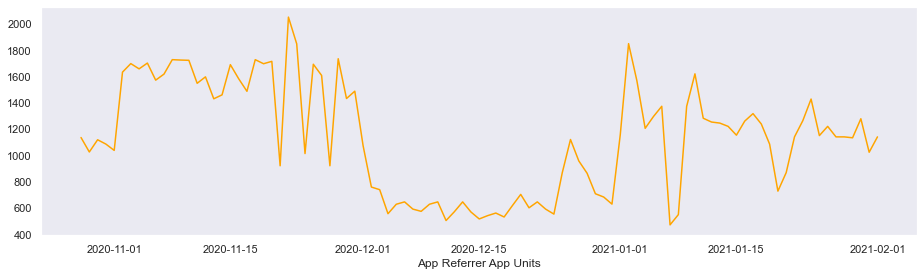

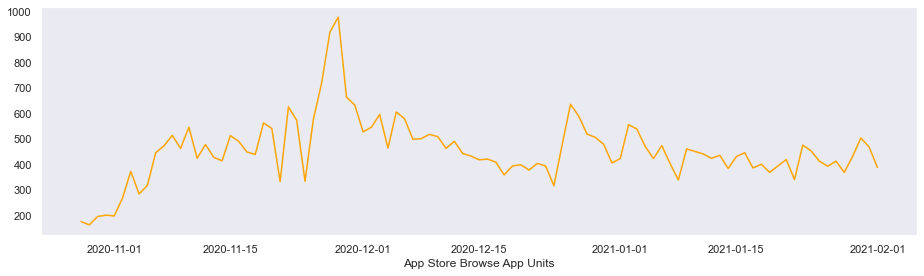

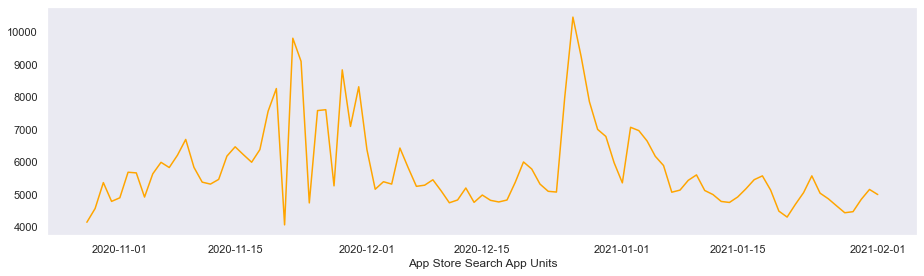

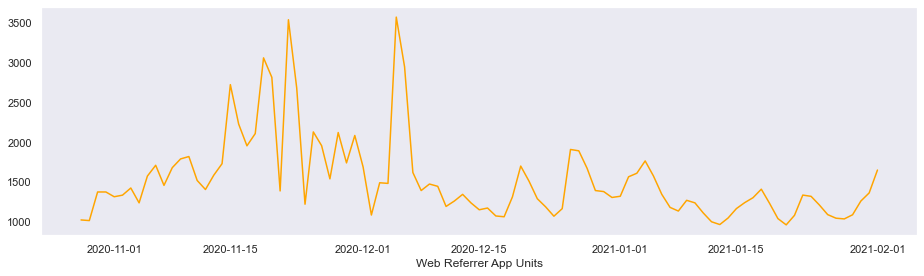

In [26]:
for i in cols:
    plt.figure(figsize = (13, 4))
    plt.xlabel(i)
    plt.title=str(i)
    plt.plot(after.index,after[i],color="orange")
    plt.grid()
    plt.tight_layout()


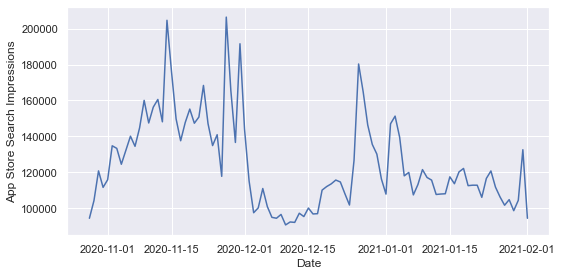

In [48]:
plt.figure(figsize = (8, 4))
sns.lineplot(data =after['App Store Search Impressions'], palette=['red'])
plt.tight_layout()

<AxesSubplot:xlabel='Date', ylabel='App Store Search App Units'>

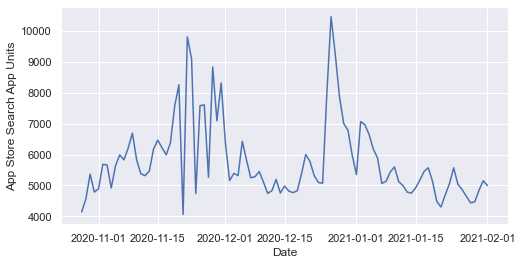

In [49]:
# app units:
plt.figure(figsize = (8,4))
sns.lineplot(data = after['App Store Search App Units'])
# sns.lineplot(data = before['App Store Browse Impressions'], palette=['red'])
# sns.lineplot(data = before['App Store Search Impressions'], palette=['green'])

# Hypothesis Test

In [52]:
#Two sample z test
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
res=[]
for i in col:
    ztest ,pval= stests.ztest(before[i], x2=after[i], alternative='two-sided')
    res.append(float(pval))
    if pval<0.05:
        print("Reject null hypothesis, different distributions. Market campaign has statistically significant on "+str(i))
    else:
        print("Accept null hypothesis, same distributions")

Reject null hypothesis, different distributions. Market campaign has statistically significant on App Referrer Impressions
Accept null hypothesis, same distributions
Reject null hypothesis, different distributions. Market campaign has statistically significant on App Store Search Impressions
Reject null hypothesis, different distributions. Market campaign has statistically significant on Unavailable Impressions
Accept null hypothesis, same distributions
Reject null hypothesis, different distributions. Market campaign has statistically significant on App Referrer App Units
Reject null hypothesis, different distributions. Market campaign has statistically significant on App Store Browse App Units
Accept null hypothesis, same distributions
Accept null hypothesis, same distributions
Accept null hypothesis, same distributions


In [53]:
a=before[['App Referrer Impressions', 
       'App Store Search Impressions',
        'App Referrer App Units',
       'App Store Browse App Units', ]]

In [54]:
b=after[['App Referrer Impressions', 
       'App Store Search Impressions',
        'App Referrer App Units',
       'App Store Browse App Units', ]]

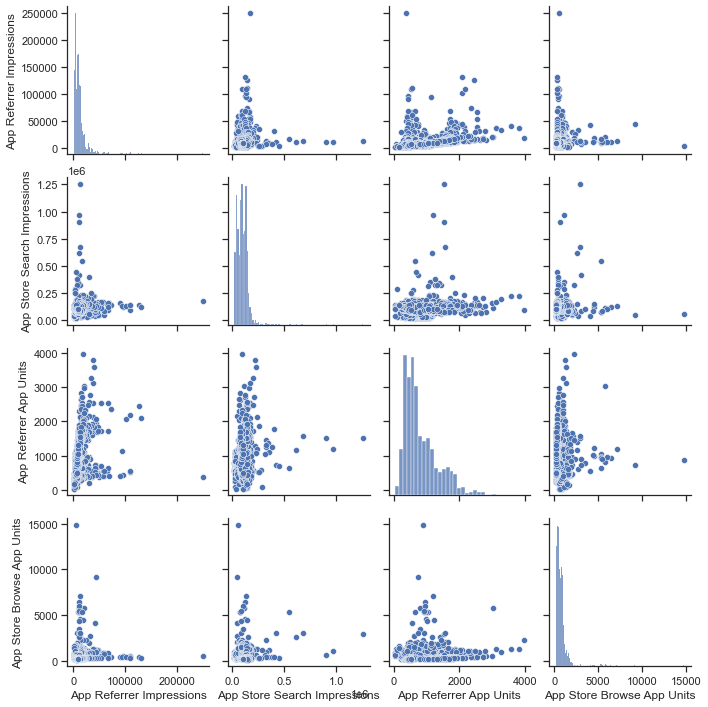

In [55]:
#before market campaign:
import seaborn as sn
sns.set(style="ticks")
pairplot1=sns.pairplot(a)
pairplot1.savefig('pairplot1.png')


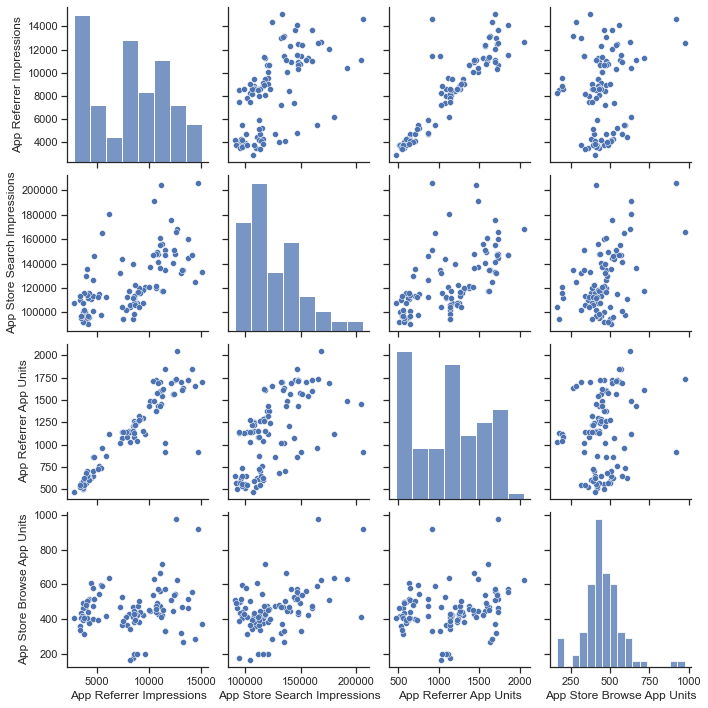

In [56]:
import seaborn as sn
sns.set(style="ticks")
pairplot2=sns.pairplot(b)
pairplot2.savefig('pairplot2.png')

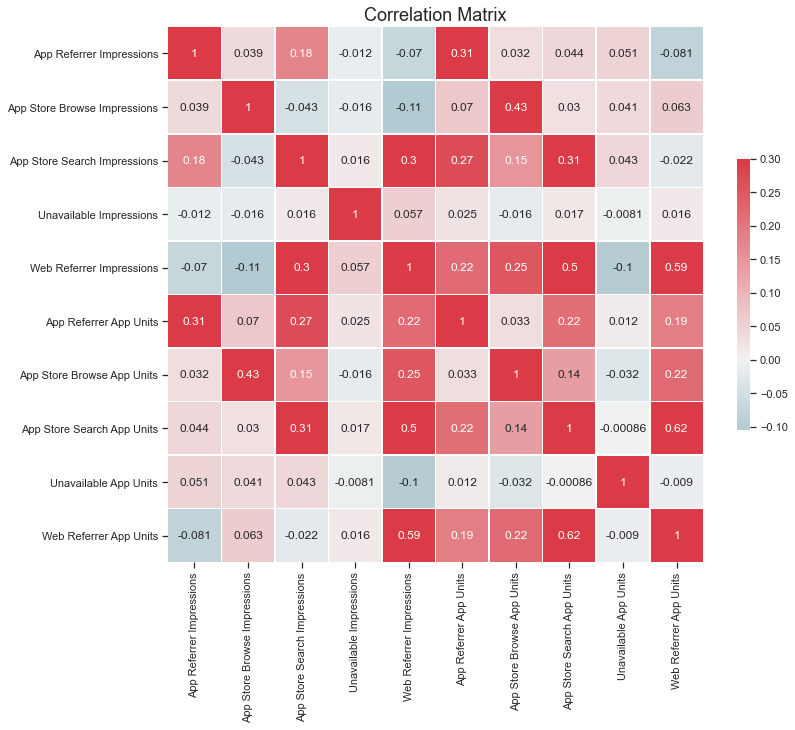

In [57]:
corr1=before.corr()
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
heatmap1=sns.heatmap(corr1,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

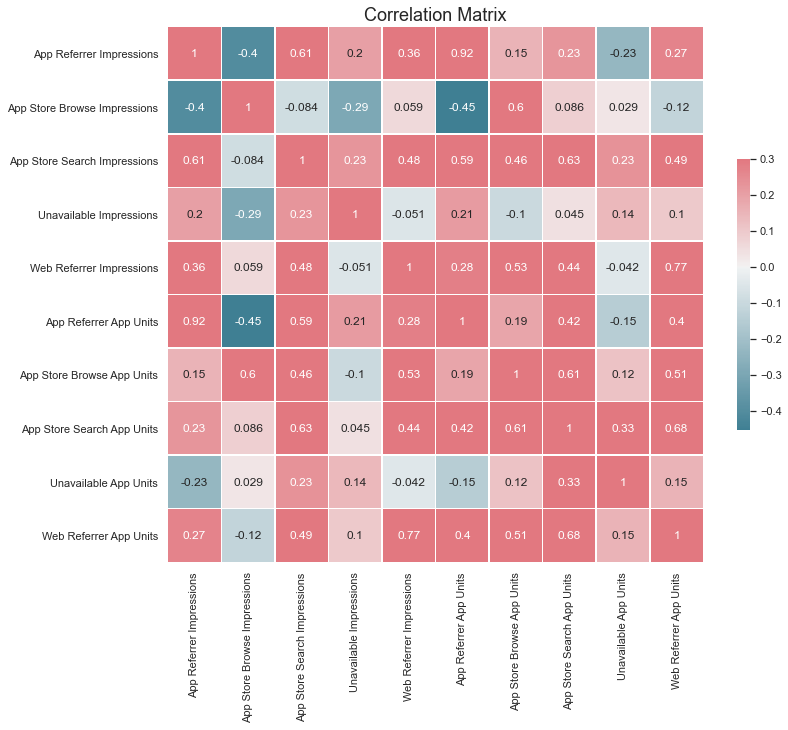

In [59]:
corr2=after.corr()
sns.set(style="white")
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
heatmap2=sns.heatmap(corr2,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


# Variables Analysis

- 1. Impressions:
- 1.1 App Referrer Impressions

In [60]:
def displot(x):
    plt.figure(figsize=(10,4))
    sns.set(font_scale=1)
    plt.ticklabel_format(useOffset=False)
    sns.set_style("darkgrid")

    plt.subplot(1,2,1)
    plt.title('Before Campaign')
    sns.distplot(before[x],color='y')

    plt.subplot(1,2,2)
    plt.title('After Campaign')
    sns.distplot(after[x])

    plt.tight_layout()
    plt.show()

In [62]:
def countplot(x):
    sns.set(font_scale=1)
    plt.figure(figsize=(20,5))
    sns.set_style("darkgrid")

    plt.subplot(1,2,1)
    plt.title('Before Campaign')
    g=sns.countplot(before[x],color='y')
    g.set(xticks=range(0,10,100), xticklabels=[i for i in range(0,10,100)])

    plt.subplot(1,2,2)
    plt.title('After Campaign')
    sns.countplot(after[x])

    plt.tight_layout()
    plt.show()
    plt.savefig('c.png')

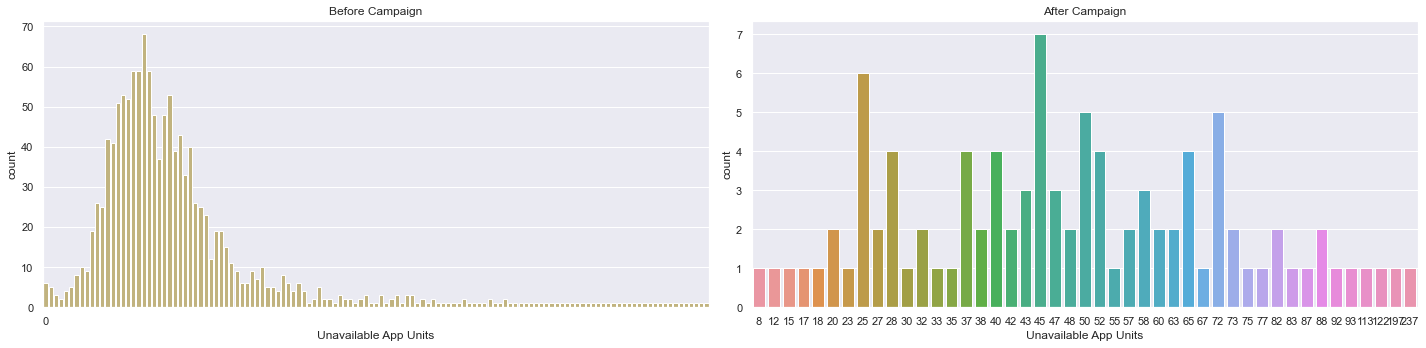

<Figure size 432x288 with 0 Axes>

In [39]:
countplot('Unavailable App Units')

In [63]:
def boxplot(x):
    sns.set(font_scale=1)
    plt.figure(figsize=(8,4))
    sns.set_style("darkgrid")

    plt.subplot(1,2,1)
    plt.title('Before Campaign')
    sns.boxplot(y=before[x],color='y')

    plt.subplot(1,2,2)
    plt.title('After Campaign')
    sns.boxplot(y=after[x])

    plt.tight_layout()
    plt.show()

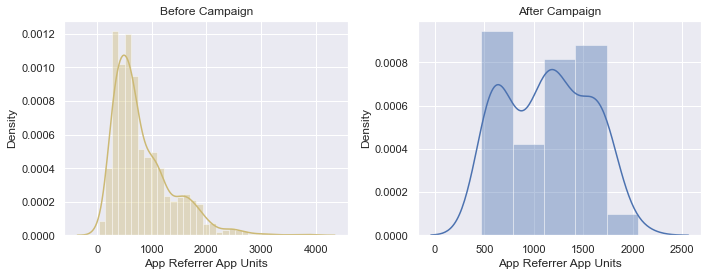

In [65]:
displot('App Referrer App Units')

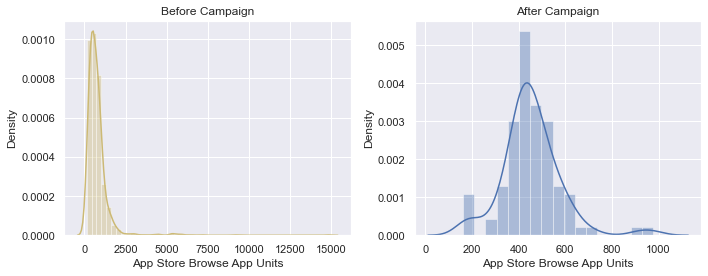

In [66]:
displot('App Store Browse App Units')

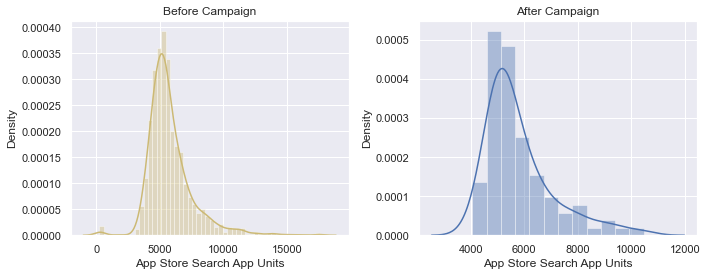

In [67]:
displot('App Store Search App Units')

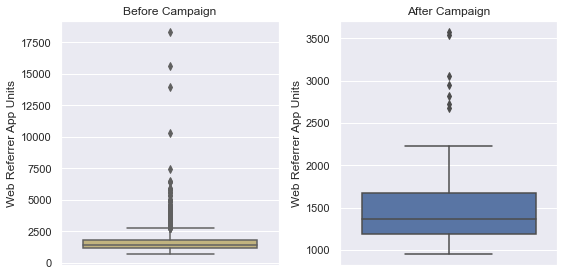

In [68]:
boxplot('Web Referrer App Units')

In [69]:
before.columns

Index(['App Referrer Impressions', 'App Store Browse Impressions',
       'App Store Search Impressions', 'Unavailable Impressions',
       'Web Referrer Impressions', 'App Referrer App Units',
       'App Store Browse App Units', 'App Store Search App Units',
       'Unavailable App Units', 'Web Referrer App Units'],
      dtype='object')

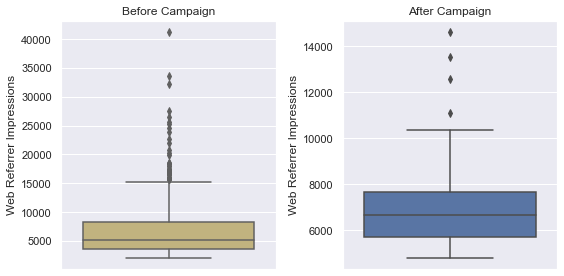

In [70]:
boxplot('Web Referrer Impressions')

In [71]:
before['Unavailable App Units']


Date
2017-04-15    42
2017-04-16    25
2017-04-17    43
2017-04-18    38
2017-04-19    43
              ..
2020-10-23    60
2020-10-24    97
2020-10-25    42
2020-10-26    20
2020-10-27    43
Name: Unavailable App Units, Length: 1292, dtype: int64

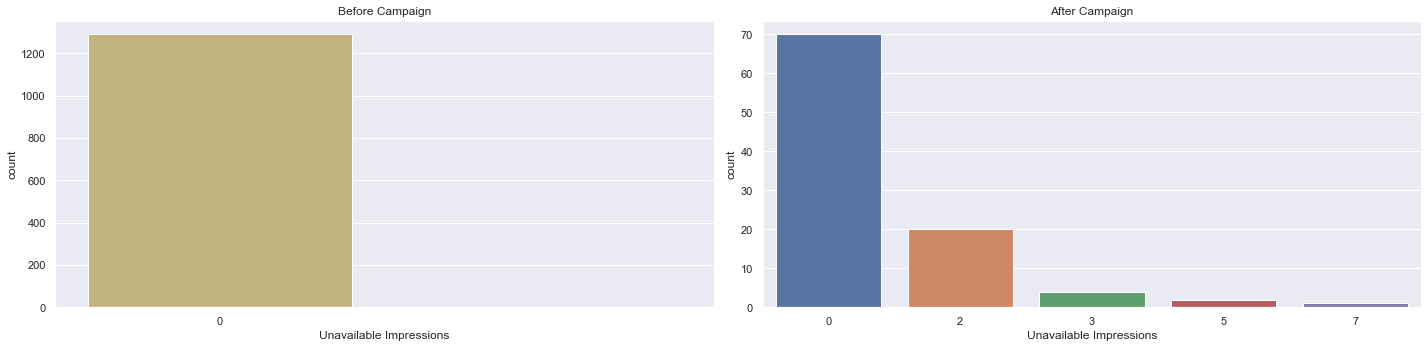

<Figure size 432x288 with 0 Axes>

In [22]:
countplot(col[3])
plt.tight_layout()
# plt.savefig('comparison.png')

In [41]:
Q=(Q3-Q1)/2
Q1=df.quantile(.25, axis = 0)
Q2=df.quantile(.5, axis = 0)
Q3=df.quantile(.75, axis = 0)
res1=[]
res2=[]
for i in range(len(col)):
    res1.append((before[col[i]]>(1.5*Q[col[i]]+Q3[col[i]])).sum())
    res2.append((after[col[i]]>(1.5*Q[col[i]]+Q3[col[i]])).sum())
res3=[]
res4=[]
for i in range(len(col)):
    res3.append((before[col[i]]<(Q1[col[i]]-1.5*Q[col[i]])).sum())
    res4.append((after[col[i]]<(Q1[col[i]]-1.5*Q[col[i]])).sum())

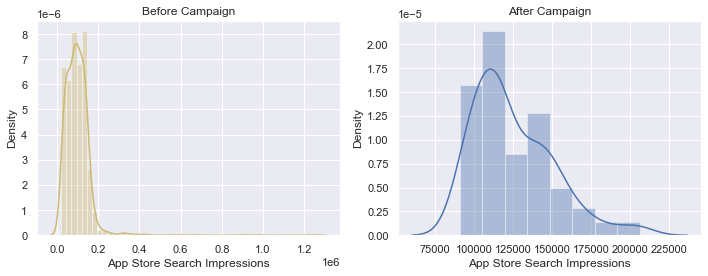

In [72]:
displot('App Store Search Impressions')

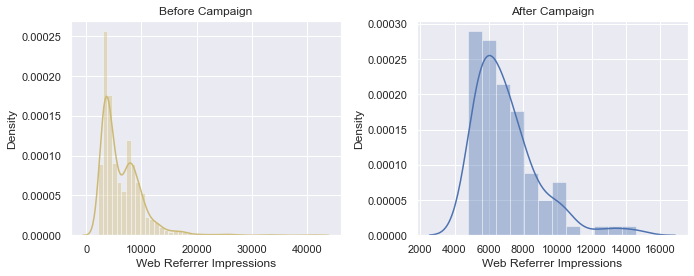

In [73]:
displot('Web Referrer Impressions')

In [76]:
after.groupby('Unavailable Impressions')['App Referrer Impressions'].count()

Unavailable Impressions
0    70
2    20
3     4
5     2
7     1
Name: App Referrer Impressions, dtype: int64

# Data modeling:
Notes: App Search impressions are the target
- 1. Get one-hot encoding for categorical data
- 2. Normalization data
- 3. GridSearch to find best model
- 4. Performance decision Tree for baseline
- 5. Optimize model based on XGBoost

In [67]:
#One-hot encoding for category data
df=pd.get_dummies(df)

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=df.drop(columns={'Date','App Store Search Impressions'}, axis=1)
y=df['App Store Search Impressions']
# Normalization:
scaler = StandardScaler()
scaler.fit_transform(X, y)
# Spliting data set:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,
                                         random_state=2021)

In [69]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
pred=lr.predict(X_test)
lr.score(X_test, y_test)

0.4317291075791202

In [75]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr,parameters, cv=5)
grid.fit(X_train, y_train)
print('Best parameters:{}'.format(grid.best_params_))
print('Best Model:{}'.format(grid.best_estimator_))
print ("r2 / variance : "), grid.best_score_
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

Best parameters:{'copy_X': True, 'fit_intercept': False, 'normalize': True}
Best Model:LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)
r2 / variance : 
Residual sum of squares: 1160622159.84


In [76]:
df.columns=[i.replace(" ","") for i in df.columns]

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
from sklearn import metrics
mod = smf.ols(formula = 'AppStoreSearchImpressions ~WebReferrerAppUnits+AppStoreSearchAppUnits+AppStoreBrowseAppUnits+AppReferrerImpressions+AppStoreSearchImpressions+AppStoreBrowseImpressions', data = df)
results = mod.fit()
print(results.summary())

                                OLS Regression Results                               
Dep. Variable:     AppStoreSearchImpressions   R-squared:                       1.000
Model:                                   OLS   Adj. R-squared:                  1.000
Method:                        Least Squares   F-statistic:                 3.232e+31
Date:                       Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                               17:09:45   Log-Likelihood:                 29148.
No. Observations:                       1389   AIC:                        -5.828e+04
Df Residuals:                           1382   BIC:                        -5.824e+04
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------